<a href="https://colab.research.google.com/github/gaganchapa/Breast_cancer_Classification/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

from tensorflow.keras.optimizers import Adam


print(tf.__version__)

2.12.0


In [2]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
cancer = datasets.load_breast_cancer()

In [5]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
X = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y = cancer.target


In [8]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [10]:
X_train.shape


(455, 30)

In [11]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
54,15.100,22.02,97.26,712.8,0.09056,0.07081,0.052530,0.033340,0.1616,0.05684,...,18.100,31.69,117.70,1030.0,0.1389,0.20570,0.271200,0.15300,0.2675,0.07873
114,8.726,15.83,55.84,230.9,0.11500,0.08201,0.041320,0.019240,0.1649,0.07633,...,9.628,19.62,64.48,284.4,0.1724,0.23640,0.245600,0.10500,0.2926,0.10170
256,19.550,28.77,133.60,1207.0,0.09260,0.20630,0.178400,0.114400,0.1893,0.06232,...,25.050,36.27,178.60,1926.0,0.1281,0.53290,0.425100,0.19410,0.2818,0.10050
176,9.904,18.06,64.60,302.4,0.09699,0.12940,0.130700,0.037160,0.1669,0.08116,...,11.260,24.39,73.07,390.2,0.1301,0.29500,0.348600,0.09910,0.2614,0.11620
52,11.940,18.24,75.71,437.6,0.08261,0.04751,0.019720,0.013490,0.1868,0.06110,...,13.100,21.33,83.67,527.2,0.1144,0.08906,0.092030,0.06296,0.2785,0.07408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,25.220,24.91,171.50,1878.0,0.10630,0.26650,0.333900,0.184500,0.1829,0.06782,...,30.000,33.62,211.70,2562.0,0.1573,0.60760,0.647600,0.28670,0.2355,0.10510
309,13.050,13.84,82.71,530.6,0.08352,0.03735,0.004559,0.008829,0.1453,0.05518,...,14.730,17.40,93.96,672.4,0.1016,0.05847,0.018240,0.03532,0.2107,0.06580
58,13.050,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,14.230,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289
357,13.870,16.21,88.52,593.7,0.08743,0.05492,0.015020,0.020880,0.1424,0.05883,...,15.110,25.58,96.74,694.4,0.1153,0.10080,0.052850,0.05556,0.2362,0.07113


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train = X_train.reshape(455,30,1)

In [14]:
X_train[0]

array([[ 0.26670379],
       [ 0.64119581],
       [ 0.21021862],
       [ 0.15202011],
       [-0.42669699],
       [-0.64010111],
       [-0.4602506 ],
       [-0.40543396],
       [-0.71937207],
       [-0.84286166],
       [-0.33100439],
       [-0.67370061],
       [-0.37070339],
       [-0.22584751],
       [-0.78201822],
       [-0.87630841],
       [-0.58213979],
       [-0.42739442],
       [-1.15077112],
       [-0.92967327],
       [ 0.37106891],
       [ 0.98105049],
       [ 0.30231657],
       [ 0.25026476],
       [ 0.28315338],
       [-0.31192267],
       [ 0.00680413],
       [ 0.57195757],
       [-0.36743271],
       [-0.29487344]])

In [15]:
epochs = 20
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape = (30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

In [17]:
model.compile(optimizer=Adam(lr=0.00001), loss = 'binary_crossentropy', metrics=['accuracy'])


In [18]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20
15/15 [==============================] - 3s 57ms/step - loss: 0.4726 - accuracy: 0.8308 - val_loss: 0.3879 - val_accuracy: 0.9123
Epoch 2/20
15/15 [==============================] - 0s 23ms/step - loss: 0.1171 - accuracy: 0.9516 - val_loss: 0.2786 - val_accuracy: 0.9298
Epoch 3/20
15/15 [==============================] - 0s 27ms/step - loss: 0.1080 - accuracy: 0.9604 - val_loss: 0.2433 - val_accuracy: 0.9211
Epoch 4/20
15/15 [==============================] - 0s 18ms/step - loss: 0.0900 - accuracy: 0.9736 - val_loss: 0.2479 - val_accuracy: 0.8860
Epoch 5/20
15/15 [==============================] - 0s 22ms/step - loss: 0.1051 - accuracy: 0.9670 - val_loss: 0.2261 - val_accuracy: 0.9211
Epoch 6/20
15/15 [==============================] - 0s 23ms/step - loss: 0.0396 - accuracy: 0.9824 - val_loss: 0.2236 - val_accuracy: 0.8947
Epoch 7/20
15/15 [==============================] - 0s 28ms/step - loss: 0.0751 - accuracy: 0.9714 - val_loss: 0.2102 - val_accuracy: 0.9035
Epoch 8/20
15

In [19]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

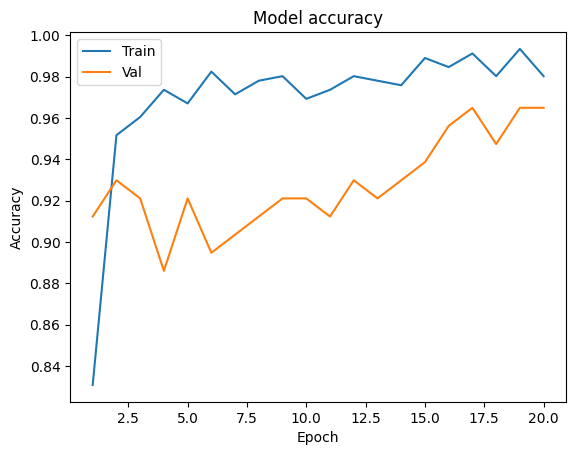

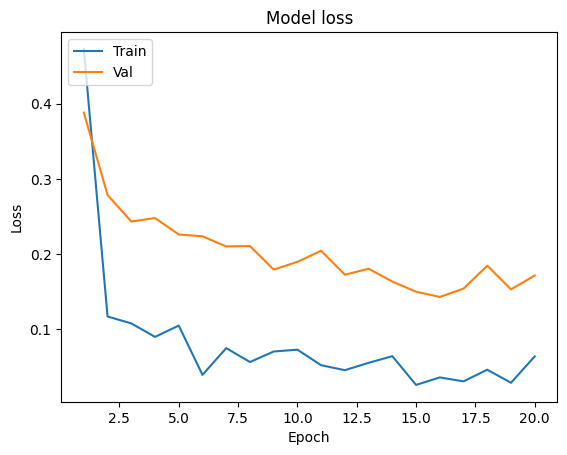

In [20]:
plot_learningCurve(history, epochs)